In [18]:
import os
from datetime import datetime
import backtrader as bt

os.chdir('/Volumes/Data/Chipy/Py-Finance/Crypto/TechnicalAnalysis/')

In [19]:
class SmaCross(bt.SignalStrategy):
        params = (('pfast', 6), ('pslow', 19),)
        def __init__(self):
            sma1, sma2 = bt.ind.SMA(period=self.p.pfast), bt.ind.SMA(period=self.p.pslow)
            self.signal_add(bt.SIGNAL_LONG, bt.ind.CrossOver(sma1, sma2))

Starting Portfolio Value: 10000.00
Final Portfolio Value: 125681.77
Final Cash Value: 125681.77
Total Value: 251363.54


<IPython.core.display.Javascript object>


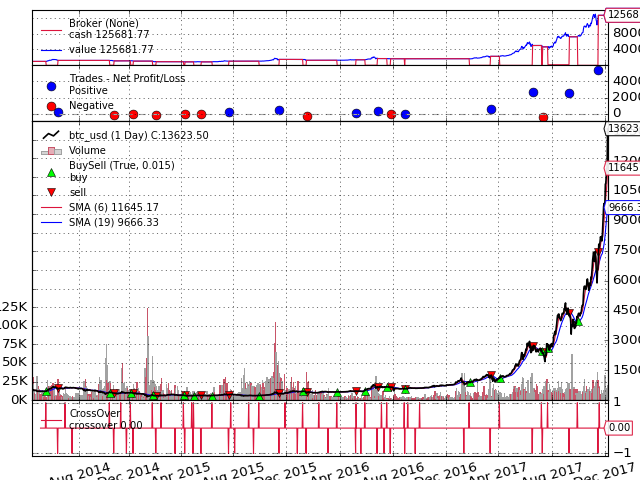

[[<matplotlib.figure.Figure at 0x10f9f4d68>]]

In [21]:
cerebro = bt.Cerebro()

#data = bt.feeds.YahooFinanceData(dataname='YHOO', fromdate=datetime(2011, 1, 1),todate=datetime(2012, 12, 31))
data = bt.feeds.GenericCSVData(dataname='btc_usd.csv',dtformat='%Y-%m-%d',openinterest=-1)

cerebro.adddata(data)
cerebro.addstrategy(SmaCross)
cerebro.addsizer(bt.sizers.PercentSizer,percents=100)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
print('Final Cash Value: %.2f' % cerebro.broker.getcash())
print('Total Value: %.2f' % (cerebro.broker.getvalue()+cerebro.broker.getcash()))
cerebro.plot()